In [1]:
# importanto as bibliotecas
import numpy as np 
import sympy as sy 
import matplotlib.pyplot as plt 
import control as ct

## Massa Mola Amortecedor Carro [ OGATA]
As equações de movimento para o sistema mostrado na Figura X são:
$$
\begin{align}
m_1 \ddot{x}_1 = -k_1 x_1 - k_2(x_1-x_2)-b(\dot{x}_1 - \dot{x}_2)+u
\end{align}
$$
$
\begin{align}
m_2 \ddot{x}_2 = -k_3 x_2 - k_2(x_2-x_1)-b(\dot{x}_2 - \dot{x}_1)
\end{align}
$

<center>
<div class="figure" >
  <img src="utils/sys.png"
       width="450"> 
  <p>Figura 1 - Sistema Massa-Mola.</p>
</div>
<center/>

Simplificando, obtemos:
$
\begin{align}
m_1 \ddot{x}_1 +b\dot{x}_1 + (k_1+ k_2 )x_1 = b\dot{x}_2+k_2x_2+u
\end{align}
$
$
\begin{align}
m_2 \ddot{x}_2 +b\dot{x}_2 + (k_2+ k_3 )x_2 = b\dot{x}_1+k_2x_1
\end{align}
$

Aplicando a transformada de Laplace nas equações acima, assumindo as condições iniciais nulas, obtemos:

$$
\begin{align}
[m_1 s^2 +bs + (k_1+ k_2 )]X_1(s) = (bs+k_2)X_2(s) +U(s)
\end{align}
$$
$$
\begin{align}
[m_2 s^2 +bs + (k_2+ k_3 )]X_2(s) = (bs+k_2)X_1(s) 
\end{align}
$$

In [2]:
# Resolvendo simbolicamente

#Constantes
m1, m2,b,k1,k2,k3,t = sy.symbols('m1 m2 b k1 k2 k3 t ')

# Variáveis
x1,x2, u = sy.symbols(r'x1 x2 u ', cls=sy.Function) # funções para se trabalhar em cima

x1 = x1(t)
x2 = x2(t)
u = u(t)
x1_d = sy.diff(x1, t)
x1_dd = sy.diff(x1_d, t)

x2_d = sy.diff(x2, t)
x2_dd = sy.diff(x2_d, t)

In [3]:
# Vetores de entrada e saida
u_1 = sy.Matrix([u])
x_t =  sy.Matrix([x1,x2,x1_d,x2_d])
x_d =  sy.Matrix([x1_d,x2_d])
y_t = sy.Matrix([x1,x2])

In [4]:
Eq1 = m1*x1_dd + b*x1_d + (k1+k2)*x1 -b*x2_d -k2*x2 + u
Eq2 = m2*x2_dd + b*x2_d + (k2+k3)*x2-b*x1_d-k2*x1

In [5]:
sol_Eq2 = sy.solve(Eq2,x2_dd)
sol_Eq2

[(b*Derivative(x1(t), t) - b*Derivative(x2(t), t) + k2*x1(t) - k2*x2(t) - k3*x2(t))/m2]

In [6]:
sol_Eq1 = sy.solve(Eq1,x1_dd)
sol_Eq1

[(-b*Derivative(x1(t), t) + b*Derivative(x2(t), t) - k1*x1(t) - k2*x1(t) + k2*x2(t) - u(t))/m1]

In [7]:
Equacoes = sy.Matrix([[Eq1], [Eq2]])
Equacoes

Matrix([
[b*Derivative(x1(t), t) - b*Derivative(x2(t), t) - k2*x2(t) + m1*Derivative(x1(t), (t, 2)) + (k1 + k2)*x1(t) + u(t)],
[      -b*Derivative(x1(t), t) + b*Derivative(x2(t), t) - k2*x1(t) + m2*Derivative(x2(t), (t, 2)) + (k2 + k3)*x2(t)]])

In [8]:
f_h = sy.Matrix([x_d,sol_Eq1,sol_Eq2])
f_h

Matrix([
[                                                                         Derivative(x1(t), t)],
[                                                                         Derivative(x2(t), t)],
[(-b*Derivative(x1(t), t) + b*Derivative(x2(t), t) - k1*x1(t) - k2*x1(t) + k2*x2(t) - u(t))/m1],
[        (b*Derivative(x1(t), t) - b*Derivative(x2(t), t) + k2*x1(t) - k2*x2(t) - k3*x2(t))/m2]])

In [9]:
valor_constantes = {m1:1, m2:1,k1:0.2,k2:0.25,k3:0.4,b:0.9}
dt = .1 

In [18]:
A_p= f_h.jacobian([x_t]).subs(valor_constantes)
A = np.matrix(A_p)
A

matrix([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [-0.450000000000000, 0.250000000000000, -0.900000000000000,
         0.900000000000000],
        [0.250000000000000, -0.650000000000000, 0.900000000000000,
         -0.900000000000000]], dtype=object)

In [11]:
B_p= f_h.jacobian([u_1]).subs(valor_constantes)
B=np.matrix(B_p)

In [12]:
C= np.identity(4)
D = np.zeros_like(B)


In [13]:
sys = ct.StateSpace(A, B, C, D)
sys_discrete = ct.c2d(sys, dt, method='zoh')

A_zoh = np.array(sys_discrete.A)
B_zoh = np.array(sys_discrete.B)

# 2 Sistema Elétrico [OGATA]

Para o sistema elétrico da figura, a função de transferência $E_o (s)/E_i (s)$ é:

$
\begin{align}
\frac{E_0 (s)}{E_i (s)}= \frac{R_1 + \frac{1}{C_1 s}}{\frac{1}{(1/R_2)+C_2 s}+R_1 +\frac{1}{C_1 s}}
\end{align}
$
Que resulta em:
$
\begin{align}
\frac{E_0 (s)}{E_i (s)}= \frac{(R_1 C_1 s+1)(R_2 C_2 s +1)}{(R_1 C_1 s +1)(R_2 C_2 s +1)+R_2 C_1 s}
\end{align}
$
$
\begin{align}
\frac{E_0 (s)}{E_i (s)}= \frac{R_1 R_2 C_1 C_2 s^2 + s(R_1 C_1 + R_2 C_2)+1}{R_1 R_2 C_1 C_2 s^2 + s(R_1 C_1 + R_2 C_2+ R_2 C_1)+1}
\end{align}
$

In [24]:
# Parâmetros do circuito
r_1 = 10000 # Ohm
r_2 = 11000 # Ohm
c_1 = 6*10**-6
c_2 = 6*10**-6
dt = 0.1
# Gerando a função de transferência

num = np.array([r_1*r_2*c_1*c_2, r_1*c_1+r_2*c_2,1])
den = np.array([r_1*r_2*c_1*c_2, r_1*c_1+r_2*c_2+r_2*c_1,1])

G = ct.tf(num,den)
print(G)


0.00396 s^2 + 0.126 s + 1
-------------------------
0.00396 s^2 + 0.192 s + 1



In [23]:
sys_eletrico = ct.tf2ss(G)
print(sys)

A = [[ -48.48484848 -252.52525253]
     [   1.            0.        ]]

B = [[1.]
     [0.]]

C = [[-16.66666667   0.        ]]

D = [[1.]]



In [31]:
sys_eletrico_discreto =ct.c2d(sys_eletrico, dt, method='zoh')

Ae_zoh = np.array(sys_eletrico_discreto.A)
Be_zoh = np.array(sys_eletrico_discreto.B)

Ce= np.identity(2)
De = np.zeros_like(Be_zoh)

# MPC

In [17]:
pip install cvxpy


  Using cached cvxpy-1.4.1-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached osqp-0.6.3-cp311-cp311-win_amd64.whl.metadata (1.8 kB)
  Using cached ecos-2.0.12-cp311-cp311-win_amd64.whl (72 kB)
  Using cached clarabel-0.6.0-cp37-abi3-win_amd64.whl.metadata (4.4 kB)
  Using cached scs-3.2.4.post1-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached pybind11-2.11.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached qdldl-0.1.7.post0-cp311-cp311-win_amd64.whl.metadata (1.8 kB)
Using cached cvxpy-1.4.1-cp311-cp311-win_amd64.whl (1.0 MB)
Using cached clarabel-0.6.0-cp37-abi3-win_amd64.whl (355 kB)
Using cached osqp-0.6.3-cp311-cp311-win_amd64.whl (292 kB)
Using cached scs-3.2.4.post1-cp311-cp311-win_amd64.whl (8.4 MB)
Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
Using cached qdldl-0.1.7.post0-cp311-cp311-win_amd64.whl (85 kB)



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import cvxpy as cp
from scipy import sparse
from math import sin, cos
import matplotlib.animation as animation

In [15]:
def plot_results():
    f = plt.figure()
    ax = f.add_subplot(211)
    plt.plot(massa1_pos, label='posição massa 1')
    plt.plot(massa2_pos, label='posição massa 2')
    #plt.plot(massa1_vel, label='velocidade massa 1')
    #plt.plot(massa2_vel, label='velocidade massa 2')
    plt.ylabel(r"$(x_t)_1$", fontsize=16)
    plt.xticks([t_step for t_step in range(nsim) if t_step % 10 == 0])
    plt.legend()
    plt.grid()

    plt.subplot(4, 1, 3)
    #plt.plot(ctrl_effort)
    plt.plot(ctrl_effort[1:])
    plt.ylabel(r"$(u_t)_1$", fontsize=16)
    plt.xticks([t_step for t_step in range(nsim) if t_step % 10 == 0])
    plt.grid()

    plt.tight_layout()
    plt.show()

In [16]:
def animated_plot():
    fig = plt.figure()
    ax = plt.axes(xlim=(-6., 6.), ylim=(-3, 3))
    time_text = ax.text(2.75, 1.75, '')
    angle_text = ax.text(2.75, 1.65, '')
    pos_text = ax.text(2.75, 1.55, '')
    times = range(nsim)

    writer = animation.writers['ffmpeg']
    writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

    def update(i):
        time_text.set_text("Time: {0:0}".format(round(times[i]*dt, 2)))
        angle_text.set_text("Angle: {0:0.2f}".format(massa2_pos[i]*57.3))
        pos_text.set_text("Pos: {0:0.2f}".format(-massa1_pos[i]))

        massa1_pos_x = -massa1_pos[i]
        massa2_pos_x = massa2_pos[i]
        massa2_x0 = massa2_pos_x
        massa2_y0 = 0
        massa2_x1 = massa2_x0  + 1
        #massa2_y1 = l*cos(pend_pos)

        massa1.set_data([massa1_pos_x-.15, massa1_pos_x+.15], 0.)
        massa2.set_data([massa2_x0,massa2_x1])
        #ball.set_data(pendulum_x1, pendulum_y1)
        return (massa1) + (massa2)

    massa1 = plt.plot([], [], 'black', linewidth=.7)
    massa2 = plt.plot([], [], 'b-',linewidth=.7)
    #ball, = plt.plot([], [], 'ro', markersize=8.)
    plt.xlabel('X position (m)')
    plt.ylabel('Y position (m)')
    anim = animation.FuncAnimation(fig, update, int(nsim), interval=100, repeat=True)
    plt.show()

TIME:  0.1 STATES:  [-2, 1, 0, 0]
TIME:  0.2 STATES:  [-1.99, 0.99, 0.22, -0.1]
TIME:  0.3 STATES:  [-1.97, 0.98, 0.24, -0.18]
TIME:  0.4 STATES:  [-1.94, 0.96, 0.24, -0.25]
TIME:  0.5 STATES:  [-1.92, 0.93, 0.24, -0.31]
TIME:  0.6 STATES:  [-1.89, 0.9, 0.24, -0.37]
TIME:  0.7 STATES:  [-1.87, 0.86, 0.24, -0.42]
TIME:  0.8 STATES:  [-1.85, 0.81, 0.24, -0.46]
TIME:  0.9 STATES:  [-1.82, 0.77, 0.23, -0.49]
TIME:  1.0 STATES:  [-1.8, 0.72, 0.23, -0.52]
TIME:  1.1 STATES:  [-1.78, 0.66, 0.23, -0.54]
TIME:  1.2 STATES:  [-1.75, 0.61, 0.23, -0.55]
TIME:  1.3 STATES:  [-1.73, 0.55, 0.23, -0.56]
TIME:  1.4 STATES:  [-1.71, 0.5, 0.22, -0.57]
TIME:  1.5 STATES:  [-1.69, 0.44, 0.22, -0.57]
TIME:  1.6 STATES:  [-1.66, 0.38, 0.22, -0.57]
TIME:  1.7 STATES:  [-1.64, 0.33, 0.22, -0.56]
TIME:  1.8 STATES:  [-1.62, 0.27, 0.21, -0.55]
TIME:  1.9 STATES:  [-1.6, 0.22, 0.21, -0.54]
TIME:  2.0 STATES:  [-1.58, 0.16, 0.21, -0.53]
TIME:  2.1 STATES:  [-1.56, 0.11, 0.2, -0.51]
TIME:  2.2 STATES:  [-1.54, 0.06

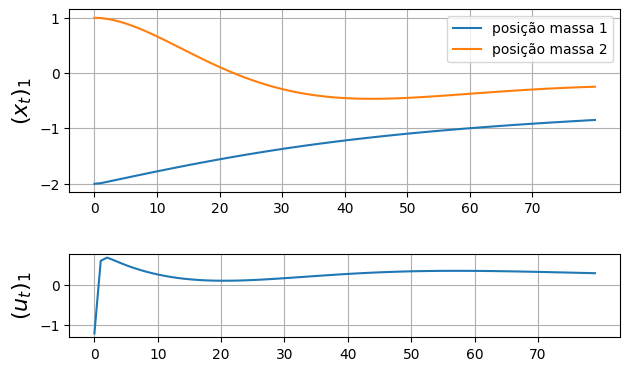

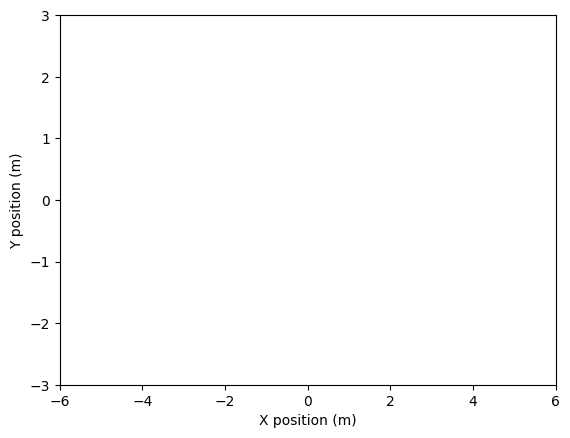

c:\Users\brend\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [17]:
def run_mpc():
    cost = 0.
    constr = [x[:, 0] == x_init]
    for t in range(N):
        cost += cp.quad_form(xr - x[:, t], Q) + cp.quad_form(u[:, t], R)
        constr += [cp.norm(u[:, t], 'inf') <= 10.]
        constr += [x[:, t + 1] == A_zoh @ x[:, t] + B_zoh @ u[:, t]]

    cost += cp.quad_form(x[:, N] - xr, Q)
    problem = cp.Problem(cp.Minimize(cost), constr)
    return problem


[nx, nu] = B_zoh.shape

Q = sparse.diags([10., 5., 100., 5.])
R = np.array([[.1]])

x0 = np.array([-2, 1, 0, 0])  # Initial conditions
xr = np.array([0, 2, 0., 0.])  # Desired states
xr *= -1

N = 20  # MPC Horizon length

x = cp.Variable((nx, N+1))
u = cp.Variable((nu, N))
x_init = cp.Parameter(nx)

nsim = 80  # Number of simulation timesteps
time = [0.001]
massa1_pos = [x0[0]]
massa2_pos = [x0[1]]
massa1_vel = [x0[2]]#
massa2_vel = [x0[3]]
ctrl_effort = [u[:, 0].value]

for i in range(1, nsim+1):
    prob = run_mpc()
    x_init.value = x0
    print('TIME: ', round(i*dt, 2), 'STATES: ', [round(state, 2) for state in x0])
    prob.solve(solver=cp.OSQP, warm_start=True)
    x0 = A_zoh.dot(x0) + B_zoh.dot(u[:, 0].value)
    time.append(i)
    massa1_pos.append(x0[0])
    massa2_pos.append(x0[1])
    massa1_vel.append(x0[2])
    massa2_vel.append(x0[3])
    ctrl_effort.append(u[:, 0].value)

plot_results()
#animated_plot()

# MPC - [Circuito Elétrico]

In [29]:
def plot_results_CE():
    f = plt.figure()
    ax = f.add_subplot(211)
    plt.plot(massa1_pos, label='posição massa 1')
    plt.plot(massa2_pos, label='posição massa 2')
    #plt.plot(massa1_vel, label='velocidade massa 1')
    #plt.plot(massa2_vel, label='velocidade massa 2')
    plt.ylabel(r"$(x_t)_1$", fontsize=16)
    plt.xticks([t_step for t_step in range(nsim) if t_step % 10 == 0])
    plt.legend()
    plt.grid()

    plt.subplot(4, 1, 3)
    #plt.plot(ctrl_effort)
    plt.plot(ctrl_effort[1:])
    plt.ylabel(r"$(u_t)_1$", fontsize=16)
    plt.xticks([t_step for t_step in range(nsim) if t_step % 10 == 0])
    plt.grid()

    plt.tight_layout()
    plt.show()

TIME:  0.1 STATES:  [15, 15]
TIME:  0.2 STATES:  [-56.67, 9.83]
TIME:  0.3 STATES:  [-32.25, 5.46]
TIME:  0.4 STATES:  [-17.85, 3.02]
TIME:  0.5 STATES:  [-9.87, 1.68]
TIME:  0.6 STATES:  [-5.46, 0.93]
TIME:  0.7 STATES:  [-3.02, 0.52]
TIME:  0.8 STATES:  [-1.67, 0.29]
TIME:  0.9 STATES:  [-0.92, 0.17]
TIME:  1.0 STATES:  [-0.51, 0.1]
TIME:  1.1 STATES:  [-0.28, 0.06]
TIME:  1.2 STATES:  [-0.16, 0.04]
TIME:  1.3 STATES:  [-0.09, 0.03]
TIME:  1.4 STATES:  [-0.05, 0.02]
TIME:  1.5 STATES:  [-0.03, 0.02]
TIME:  1.6 STATES:  [-0.01, 0.01]
TIME:  1.7 STATES:  [-0.01, 0.01]
TIME:  1.8 STATES:  [-0.0, 0.01]
TIME:  1.9 STATES:  [-0.0, 0.01]
TIME:  2.0 STATES:  [-0.0, 0.01]
TIME:  2.1 STATES:  [-0.0, 0.01]
TIME:  2.2 STATES:  [-0.0, 0.01]
TIME:  2.3 STATES:  [-0.0, 0.01]
TIME:  2.4 STATES:  [-0.0, 0.01]
TIME:  2.5 STATES:  [-0.0, 0.01]
TIME:  2.6 STATES:  [-0.0, 0.01]
TIME:  2.7 STATES:  [-0.0, 0.01]
TIME:  2.8 STATES:  [-0.0, 0.01]
TIME:  2.9 STATES:  [-0.0, 0.01]
TIME:  3.0 STATES:  [-0.0, 0.

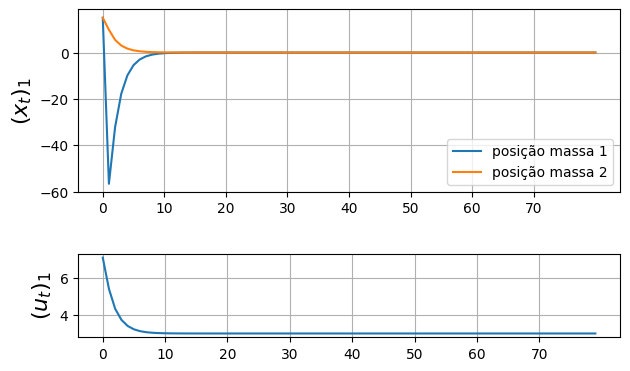

In [39]:
def run_mpc():
    cost = 0.
    constr = [x[:, 0] == x_init]
    for t in range(N):
        cost += cp.quad_form(xr - x[:, t], Q) + cp.quad_form(u[:, t], R)
        constr += [cp.norm(u[:, t], 'inf') <= 10.]
        constr += [x[:, t + 1] == Ae_zoh @ x[:, t] + Be_zoh @ u[:, t]]

    cost += cp.quad_form(x[:, N] - xr, Q)
    problem = cp.Problem(cp.Minimize(cost), constr)
    return problem


[nx, nu] = Be_zoh.shape

Q = sparse.diags([1., 5.])
R = np.array([[.1]])

x0 = np.array([15, 15 ])  # Initial conditions
xr = np.array([15, 15])  # Desired states
xr *= +1#-1

N = 10  # MPC Horizon length

x = cp.Variable((nx, N+1))
u = cp.Variable((nu, N))
x_init = cp.Parameter(nx)

nsim = 80  # Number of simulation timesteps
time = [0.001]
massa1_pos = [x0[0]]
massa2_pos = [x0[1]]
#massa1_vel = [x0[2]]#
#massa2_vel = [x0[3]]
ctrl_effort = [u[:, 0].value]

for i in range(1, nsim+1):
    prob = run_mpc()
    x_init.value = x0
    print('TIME: ', round(i*dt, 2), 'STATES: ', [round(state, 2) for state in x0])
    prob.solve(solver=cp.OSQP, warm_start=True)
    x0 = Ae_zoh.dot(x0) + Be_zoh.dot(u[:, 0].value)
    time.append(i)
    massa1_pos.append(x0[0])
    massa2_pos.append(x0[1])
    #massa1_vel.append(x0[2])
    #massa2_vel.append(x0[3])
    ctrl_effort.append(u[:, 0].value)

plot_results_CE()